In [1]:
# load libraries that will be helpful in exploring and analyzing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
nfl_wr_files = glob.glob('FantasyPros*.csv')

nfl_wr_file_list = []

for file in nfl_wr_files:
  data = pd.read_csv(file)
  nfl_wr_file_list.append(data)

nfl_wr_2013_2022 = pd.concat(nfl_wr_file_list)

# print the length to ensure that all files were glob'd correctly. There should be 240 entries.
print(len(nfl_wr_2013_2022))

240


In [3]:
# as was the case in NFL WRs.ipynb, the YDS column needs to be updated
nfl_wr_2013_2022['YDS'] = nfl_wr_2013_2022['YDS'].replace(',', '', regex=True)
nfl_wr_2013_2022.YDS = pd.to_numeric(nfl_wr_2013_2022.YDS)

In [5]:
# ensure it was updated correctly and display the columns
print(nfl_wr_2013_2022.columns)
print(nfl_wr_2013_2022.dtypes)

Index(['Rank', 'Player', 'REC', 'TGT', 'YDS', 'Y/R', 'LG', '20+', 'TD', 'ATT',
       'YDS.1', 'TD.1', 'FL', 'G', 'FPTS', 'FPTS/G', 'ROST', 'DRAFTED', 'YEAR',
       'YRDrafted', 'YearInLeague', 'DraftedTeam'],
      dtype='object')
Rank              int64
Player           object
REC               int64
TGT               int64
YDS               int64
Y/R             float64
LG                int64
20+               int64
TD                int64
ATT               int64
YDS.1             int64
TD.1              int64
FL                int64
G                 int64
FPTS            float64
FPTS/G          float64
ROST             object
DRAFTED           int64
YEAR              int64
YRDrafted         int64
YearInLeague      int64
DraftedTeam      object
dtype: object


In [6]:
# note, the YDS.1 and TD.1 are the players rushing statistics. The original CSV from Fantasy Pros had both YDS and TD columns labeled the same and when loaded into this notebook the second of the two were given the ".1" and that data is the rushing statistics
nfl_wr_2013_2022.head()

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
0,1,Demaryius Thomas (FA),92,142,1430,15.5,78,19,14,0,...,0,16,273.0,17.1,0.10%,1,2013,2010,4,Broncos
1,2,Josh Gordon (FA),87,159,1646,18.9,95,30,9,5,...,0,14,270.9,19.4,0.00%,2,2013,2012,2,Browns
2,3,Calvin Johnson (FA),84,157,1492,17.8,87,22,12,0,...,1,14,261.2,18.7,0.10%,1,2013,2007,7,Lions
3,4,A.J. Green (FA),98,178,1426,14.6,82,18,11,0,...,0,16,257.6,16.1,0.60%,1,2013,2011,3,Bengals
4,5,Brandon Marshall (FA),100,163,1295,13.0,44,16,12,0,...,0,16,255.5,16.0,2.60%,4,2013,2006,8,Broncos


In [7]:
# starting exploration of data by looking at summary statistics
nfl_wr_2013_2022.describe(include = 'all')

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
count,240.000000,240,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240,240.000000,240.000000,240.000000,240.000000,240
unique,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,32
top,NaN,Mike Evans (TB),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00%,NaN,NaN,NaN,NaN,Steelers
freq,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39,NaN,NaN,NaN,NaN,18
mean,12.500000,NaN,87.145833,135.495833,1173.416667,13.663333,61.575000,22.908333,7.891667,3.337500,...,0.587500,15.600000,210.798750,13.555417,NaN,2.550000,2017.500000,2013.570833,4.929167,NaN
std,6.936653,NaN,17.457407,23.597390,224.257924,2.172939,14.453887,9.984503,2.956578,5.690652,...,0.726551,1.085469,37.977887,2.445483,NaN,1.922559,2.878284,4.158369,2.747228,NaN
min,1.000000,NaN,43.000000,66.000000,593.000000,8.600000,28.000000,6.000000,2.000000,0.000000,...,0.000000,9.000000,151.900000,9.500000,NaN,1.000000,2013.000000,2001.000000,1.000000,NaN
25%,6.750000,NaN,75.000000,119.000000,1023.000000,12.100000,51.000000,16.000000,6.000000,0.000000,...,0.000000,15.000000,181.525000,11.800000,NaN,1.000000,2015.000000,2011.000000,3.000000,NaN
50%,12.500000,NaN,85.500000,134.000000,1133.500000,13.500000,60.000000,20.000000,8.000000,1.000000,...,0.000000,16.000000,201.350000,13.000000,NaN,2.000000,2017.500000,2014.000000,5.000000,NaN
75%,18.250000,NaN,99.000000,150.000000,1315.000000,15.100000,72.000000,29.000000,9.250000,5.000000,...,1.000000,16.000000,230.225000,14.825000,NaN,3.000000,2020.000000,2016.000000,7.000000,NaN


In [8]:
nfl_wr_2013_2022.DraftedTeam.value_counts()

Steelers      18
Seahawks      14
Vikings       12
Bengals       12
Buccaneers    12
Broncos       11
Chargers      11
Packers       11
Cardinals     10
Saints        10
Dolphins      10
Panthers       9
Falcons        9
Raiders        8
Colts          8
Cowboys        7
Lions          7
Eagles         7
Texans         7
Chiefs         6
Patriots       5
Jaguars        5
Bills          4
49ers          4
Titans         4
Bears          4
Giants         4
Jets           3
Rams           3
Ravens         2
Commanders     2
Browns         1
Name: DraftedTeam, dtype: int64

In [11]:
print(len(nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 1].value_counts()))
nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 1].value_counts()

21


Buccaneers    9
Falcons       9
Texans        7
Raiders       6
Saints        6
Panthers      6
Broncos       6
Cowboys       6
Bengals       6
Cardinals     5
Giants        4
Eagles        4
Lions         3
49ers         3
Dolphins      3
Vikings       3
Chargers      2
Titans        1
Bills         1
Ravens        1
Jets          1
Name: DraftedTeam, dtype: int64

In [12]:
print(len(nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 2].value_counts()))
nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 2].value_counts()

19


Packers      11
Seahawks      6
Dolphins      5
Steelers      4
Bengals       4
Jaguars       4
Saints        4
Eagles        3
Cardinals     3
Titans        3
Bears         3
Bills         3
Colts         2
Panthers      1
Ravens        1
Chargers      1
Broncos       1
49ers         1
Browns        1
Name: DraftedTeam, dtype: int64

In [13]:
print(len(nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 3].value_counts()))
nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 3].value_counts()

13


Steelers      8
Chargers      6
Colts         5
Seahawks      5
Buccaneers    3
Rams          3
Broncos       2
Panthers      2
Cardinals     2
Lions         2
Commanders    2
Raiders       1
Cowboys       1
Name: DraftedTeam, dtype: int64

In [14]:
print(len(nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 4].value_counts()))
nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 4].value_counts()

3


Broncos     2
Lions       2
Dolphins    1
Name: DraftedTeam, dtype: int64

In [15]:
print(len(nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 5].value_counts()))
nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 5].value_counts()

5


Chiefs     6
Vikings    6
Bengals    2
Raiders    1
Bears      1
Name: DraftedTeam, dtype: int64

In [16]:
print(len(nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 6].value_counts()))
nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 6].value_counts()

2


Steelers    6
Colts       1
Name: DraftedTeam, dtype: int64

In [17]:
print(len(nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 7].value_counts()))
nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 7].value_counts()

2


Patriots    5
Dolphins    1
Name: DraftedTeam, dtype: int64

In [18]:
print(len(nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 8].value_counts()))
nfl_wr_2013_2022.DraftedTeam[nfl_wr_2013_2022.DRAFTED == 8].value_counts()

5


Seahawks    3
Vikings     3
Chargers    2
Jets        2
Jaguars     1
Name: DraftedTeam, dtype: int64

In [21]:
nfl_wr_2013_2022.YearInLeague.value_counts()

2     40
3     33
5     32
6     30
7     23
4     22
8     20
1     17
9     10
10     5
11     3
14     2
12     2
13     1
Name: YearInLeague, dtype: int64

In [25]:
print('10 Years in League: ')
print(nfl_wr_2013_2022[nfl_wr_2013_2022.YearInLeague == 10])
print('\n11 Years in League: ')
print(nfl_wr_2013_2022[nfl_wr_2013_2022.YearInLeague == 11])
print('\n12 Years in League: ')
print(nfl_wr_2013_2022[nfl_wr_2013_2022.YearInLeague == 12])
print('\n13 Years in League: ')
print(nfl_wr_2013_2022[nfl_wr_2013_2022.YearInLeague == 13])
print('\n14 Years in League: ')
print(nfl_wr_2013_2022[nfl_wr_2013_2022.YearInLeague == 14])

10 Years in League: 
    Rank                 Player  REC  TGT   YDS   Y/R  LG  20+  TD  ATT  ...  \
16    17  Larry Fitzgerald (FA)   82  134   954  11.6  75   11  10    2  ...   
19    20        Wes Welker (FA)   73  111   778  10.7  33   12  10    0  ...   
22    23       Roddy White (FA)   80  125   921  11.5  39   14   7    0  ...   
2      3  Brandon Marshall (FA)  109  173  1502  13.8  69   19  14    0  ...   
21    22    Julian Edelman (FA)   74  108   850  11.5  36   17   6    9  ...   

    FL   G   FPTS  FPTS/G    ROST  DRAFTED  YEAR  YRDrafted  YearInLeague  \
16   1  16  195.2    12.2   0.20%        1  2013       2004            10   
19   1  13  172.3    13.3   0.00%        8  2013       2004            10   
22   1  14  172.1    12.3   0.00%        1  2014       2005            10   
2    2  16  284.7    17.8   2.60%        4  2015       2006            10   
21   0  12  170.4    14.2  12.10%        7  2018       2009            10   

    DraftedTeam  
16    Cardinals  

In [30]:
nfl_wr_2013_2022.Player[nfl_wr_2013_2022.DRAFTED == 8].value_counts()

Doug Baldwin (FA)        3
Adam Thielen (CAR)       3
Chosen Anderson (MIA)    2
Wes Welker (FA)          1
Allen Hurns (FA)         1
Tyrell Williams (FA)     1
Name: Player, dtype: int64

In [36]:
nfl_wr_2013_2022[nfl_wr_2013_2022.Player == 'Doug Baldwin (FA)']

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
7,8,Doug Baldwin (FA),78,103,1069,13.7,80,16,14,0,...,0,16,229.9,14.4,0.00%,8,2015,2011,5,Seahawks
9,10,Doug Baldwin (FA),94,125,1128,12.0,59,16,7,3,...,0,16,206.6,12.9,0.00%,8,2016,2011,6,Seahawks
12,13,Doug Baldwin (FA),75,116,991,13.2,54,18,8,2,...,0,16,185.8,11.6,0.00%,8,2017,2011,7,Seahawks


In [37]:
nfl_wr_2013_2022[nfl_wr_2013_2022.Player == 'Adam Thielen (CAR)']

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
9,10,Adam Thielen (CAR),91,142,1276,14.0,65,20,4,1,...,2,16,194.2,12.1,85.00%,8,2017,2013,5,Vikings
6,7,Adam Thielen (CAR),113,153,1373,12.2,68,28,9,5,...,1,16,250.8,15.7,85.00%,8,2018,2013,6,Vikings
7,8,Adam Thielen (CAR),74,108,925,12.5,51,18,14,3,...,0,15,217.0,14.5,85.00%,8,2020,2013,8,Vikings


In [38]:
nfl_wr_2013_2022[nfl_wr_2013_2022.Player == 'Chosen Anderson (MIA)']

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
15,16,Chosen Anderson (MIA),63,114,941,14.9,69,17,7,3,...,0,16,168.5,10.5,1.70%,8,2017,2016,2,Jets
23,24,Chosen Anderson (MIA),95,136,1096,11.5,75,25,3,4,...,1,16,176.6,11.0,1.70%,8,2020,2016,5,Jets


In [41]:
nfl_wr_2013_2022[nfl_wr_2013_2022.Player == 'Tyrell Williams (FA)']

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
14,15,Tyrell Williams (FA),69,119,1059,15.3,51,19,7,0,...,0,16,182.4,11.4,0.00%,8,2016,2015,2,Chargers


In [45]:
nfl_wr_2013_2022[nfl_wr_2013_2022.YearInLeague == 9]

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
14,15,Vincent Jackson (FA),78,160,1224,15.7,60,19,7,1,...,0,16,203.4,12.7,0.00%,2,2013,2005,9,Chargers
9,10,Calvin Johnson (FA),88,149,1214,13.8,57,16,9,0,...,1,16,217.4,13.6,0.10%,1,2015,2007,9,Lions
0,1,Jordy Nelson (FA),97,152,1257,13.0,60,19,14,0,...,1,16,256.2,16.0,0.10%,2,2016,2008,9,Packers
3,4,Antonio Brown (FA),104,168,1297,12.5,78,33,15,0,...,0,15,271.7,18.1,0.30%,6,2018,2010,9,Steelers
22,23,Emmanuel Sanders (FA),71,98,868,12.2,64,25,4,4,...,0,12,162.7,13.6,0.00%,3,2018,2010,9,Steelers
2,3,Julio Jones (FA),99,157,1394,14.1,54,34,6,2,...,0,15,224.6,15.0,7.40%,1,2019,2011,9,Falcons
16,17,Marvin Jones Jr. (DET),76,115,978,12.9,43,23,9,0,...,0,16,189.8,11.9,4.90%,5,2020,2012,9,Bengals
13,14,Keenan Allen (LAC),106,157,1138,10.7,42,19,6,0,...,0,16,204.8,12.8,98.50%,3,2021,2013,9,Chargers
1,2,Davante Adams (LV),100,180,1516,15.2,60,47,14,3,...,0,17,285.5,16.8,99.90%,2,2022,2014,9,Packers
15,16,Mike Evans (TB),77,127,1124,14.6,63,34,6,0,...,0,15,186.9,12.5,94.70%,1,2022,2014,9,Buccaneers


In [47]:
nfl_wr_2013_2022[nfl_wr_2013_2022.YearInLeague == 3]

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
3,4,A.J. Green (FA),98,178,1426,14.6,82,18,11,0,...,0,16,257.6,16.1,0.60%,1,2013,2011,3,Bengals
20,21,Torrey Smith (FA),65,137,1128,17.4,74,20,4,0,...,0,16,171.3,10.7,0.00%,2,2013,2011,3,Ravens
9,10,Alshon Jeffery (FA),85,145,1133,13.3,74,17,10,6,...,0,16,219.1,13.7,0.00%,2,2014,2012,3,Bears
10,11,T.Y. Hilton (FA),82,131,1345,16.4,73,21,7,2,...,1,15,217.5,14.5,1.60%,3,2014,2012,3,Colts
3,4,DeAndre Hopkins (ARI),111,192,1521,13.7,61,19,11,0,...,0,16,275.6,17.2,95.80%,1,2015,2013,3,Texans
1,2,Mike Evans (TB),96,173,1321,13.8,45,15,12,0,...,0,16,256.1,16.0,94.70%,1,2016,2014,3,Buccaneers
3,4,Odell Beckham Jr. (BAL),101,169,1367,13.5,75,20,10,1,...,1,16,246.1,15.4,44.50%,1,2016,2014,3,Giants
7,8,Davante Adams (LV),75,121,997,13.3,66,17,12,0,...,1,16,209.2,13.1,99.90%,2,2016,2014,3,Packers
8,9,Brandin Cooks (DAL),78,117,1173,15.0,98,15,8,6,...,0,16,207.3,13.0,72.00%,1,2016,2014,3,Saints
13,14,Jarvis Landry (FA),94,131,1136,12.1,71,16,4,5,...,2,16,184.3,11.5,7.30%,2,2016,2014,3,Dolphins


In [48]:
nfl_wr_2013_2022[nfl_wr_2013_2022.YearInLeague == 2]

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
1,2,Josh Gordon (FA),87,159,1646,18.9,95,30,9,5,...,0,14,270.9,19.4,0.00%,2,2013,2012,2,Browns
7,8,Alshon Jeffery (FA),89,150,1421,16.0,80,20,7,16,...,1,16,239.1,14.9,0.00%,2,2013,2012,2,Bears
18,19,T.Y. Hilton (FA),82,138,1083,13.2,73,13,5,2,...,0,16,179.9,11.2,1.60%,3,2013,2012,2,Colts
21,22,Kendall Wright (FA),94,140,1079,11.5,45,17,2,0,...,0,16,166.9,10.4,0.00%,1,2013,2012,2,Titans
22,23,Michael Floyd (FA),65,112,1041,16.0,91,17,5,0,...,0,16,166.6,10.4,0.00%,1,2013,2012,2,Cardinals
13,14,DeAndre Hopkins (ARI),76,127,1210,15.9,76,20,6,0,...,1,16,193.0,12.1,95.80%,1,2014,2013,2,Texans
4,5,Odell Beckham Jr. (BAL),96,158,1450,15.1,87,19,13,1,...,0,15,271.3,18.1,44.50%,1,2015,2014,2,Giants
5,6,Allen Robinson II (PIT),80,151,1400,17.5,90,31,14,0,...,0,16,264.0,16.5,19.70%,2,2015,2014,2,Jaguars
11,12,Jarvis Landry (FA),110,166,1157,10.5,50,10,4,18,...,0,16,214.4,13.4,7.30%,2,2015,2014,2,Dolphins
13,14,Brandin Cooks (DAL),84,129,1138,13.5,71,18,9,8,...,0,16,211.6,13.2,72.00%,1,2015,2014,2,Saints


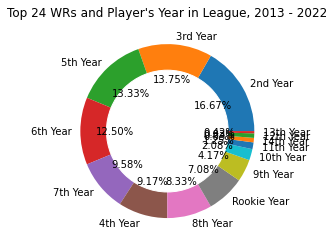

In [55]:
# create a donut chart and save the figure to share for the top WRs and where they were originally drafted

year = nfl_wr_2013_2022.YearInLeague.value_counts()
year_played = ['2nd Year', '3rd Year', '5th Year', '6th Year', '7th Year', '4th Year', '8th Year', 'Rookie Year', '9th Year', '10th Year', '11th Year', '14th Year', '12th Year', '13th Year']
plt.pie(year, labels = year_played, autopct='%.2f%%')
plt.title('Top 24 WRs and Player\'s Year in League, 2013 - 2022')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



In [56]:
nfl_wr_2013_2022.YearInLeague.value_counts()

2     40
3     33
5     32
6     30
7     23
4     22
8     20
1     17
9     10
10     5
11     3
14     2
12     2
13     1
Name: YearInLeague, dtype: int64

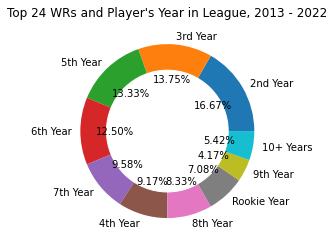

In [60]:
# slices too small to effectively read 10th to 14th years, lumping them together as 10+

year = [40,33,32,30,23,22,20,17,10,13]
year_played = ['2nd Year', '3rd Year', '5th Year', '6th Year', '7th Year', '4th Year', '8th Year', 'Rookie Year', '9th Year', '10+ Years']
plt.pie(year, labels = year_played, autopct='%.2f%%')
plt.title('Top 24 WRs and Player\'s Year in League, 2013 - 2022')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('top24_WRs_YearInLeague.png', dpi=300, bbox_inches='tight', facecolor='#f2f2f2')
plt.show()

In [61]:
nfl_wr_2013_2022[nfl_wr_2013_2022.YearInLeague == 1]

,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,...,FL,G,FPTS,FPTS/G,ROST,DRAFTED,YEAR,YRDrafted,YearInLeague,DraftedTeam
17,18,Keenan Allen (LAC),71,104,1046,14.7,43,16,8,0,...,2,15,184.1,12.3,98.50%,3,2013,2013,1,Chargers
5,6,Odell Beckham Jr. (BAL),91,130,1305,14.3,80,16,12,7,...,1,12,249.5,20.8,44.50%,1,2014,2014,1,Giants
11,12,Mike Evans (TB),68,123,1051,15.5,56,20,12,0,...,0,15,211.1,14.1,94.70%,1,2014,2014,1,Buccaneers
15,16,Kelvin Benjamin (FA),73,145,1008,13.8,51,14,9,0,...,1,16,189.3,11.8,0.10%,1,2014,2014,1,Panthers
21,22,Amari Cooper (CLE),72,130,1070,14.9,68,16,6,3,...,1,16,176.7,11.0,95.20%,1,2015,2015,1,Raiders
6,7,Michael Thomas (NO),92,121,1137,12.4,46,18,9,0,...,2,15,209.7,14.0,52.70%,2,2016,2016,1,Saints
21,22,Tyreek Hill (MIA),61,83,593,9.7,49,8,6,24,...,1,16,168.5,10.5,99.90%,5,2016,2016,1,Chiefs
21,22,JuJu Smith-Schuster (NE),58,79,917,15.8,97,12,7,0,...,0,14,162.7,11.6,89.60%,2,2017,2017,1,Steelers
19,20,Calvin Ridley (JAC),64,92,821,12.8,75,24,10,6,...,1,16,174.8,10.9,45.50%,1,2018,2018,1,Falcons
14,15,A.J. Brown (PHI),52,84,1051,20.2,91,40,8,3,...,0,16,191.1,11.9,99.80%,2,2019,2019,1,Titans


In [62]:
# create a new data with the top 12 wide receivers
top_12 = nfl_wr_2013_2022[nfl_wr_2013_2022["Rank"].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])]


In [63]:
# check length, should be 120
len(top_12)

120

In [64]:
# compare the year in league column for top 24 vs top 12 receivers
nfl_wr_2013_2022.YearInLeague.value_counts()

2     40
3     33
5     32
6     30
7     23
4     22
8     20
1     17
9     10
10     5
11     3
14     2
12     2
13     1
Name: YearInLeague, dtype: int64

In [65]:
top_12.YearInLeague.value_counts()

3     20
5     19
6     17
2     16
7     12
4     11
8     10
1      5
9      5
11     2
10     1
12     1
14     1
Name: YearInLeague, dtype: int64

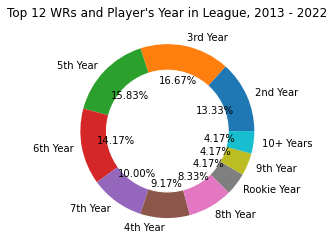

In [67]:
# maintaining the 10+ field for readability

year = [16,20,19,17,12,11,10,5,5,5]
year_played = ['2nd Year', '3rd Year', '5th Year', '6th Year', '7th Year', '4th Year', '8th Year', 'Rookie Year', '9th Year', '10+ Years']
plt.pie(year, labels = year_played, autopct='%.2f%%')
plt.title('Top 12 WRs and Player\'s Year in League, 2013 - 2022')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('top12_WRs_YearInLeague.png', dpi=300, bbox_inches='tight', facecolor='#f2f2f2')
plt.show()

In [68]:
top_12.Player.value_counts()

Julio Jones (FA)            6
Antonio Brown (FA)          6
Mike Evans (TB)             6
Tyreek Hill (MIA)           5
Davante Adams (LV)          5
DeAndre Hopkins (ARI)       5
Stefon Diggs (BUF)          4
Michael Thomas (NO)         4
Demaryius Thomas (FA)       3
Justin Jefferson (MIN)      3
Adam Thielen (CAR)          3
Keenan Allen (LAC)          3
Allen Robinson II (PIT)     3
Amari Cooper (CLE)          3
A.J. Green (FA)             3
Odell Beckham Jr. (BAL)     3
Jordy Nelson (FA)           3
Brandin Cooks (DAL)         2
DK Metcalf (SEA)            2
Cooper Kupp (LAR)           2
A.J. Brown (PHI)            2
Brandon Marshall (FA)       2
Ja'Marr Chase (CIN)         2
Dez Bryant (FA)             2
Alshon Jeffery (FA)         2
Calvin Johnson (FA)         2
Jarvis Landry (FA)          2
Larry Fitzgerald (FA)       2
Doug Baldwin (FA)           2
T.Y. Hilton (FA)            2
Hunter Renfrow (LV)         1
Calvin Ridley (JAC)         1
Diontae Johnson (PIT)       1
CeeDee Lam

In [72]:
sorted(top_12.Player[top_12.YearInLeague == 1])

["Ja'Marr Chase (CIN)",
 'Justin Jefferson (MIN)',
 'Michael Thomas (NO)',
 'Mike Evans (TB)',
 'Odell Beckham Jr. (BAL)']

In [75]:
sorted(nfl_wr_2013_2022.Player[nfl_wr_2013_2022.YearInLeague == 1])

['A.J. Brown (PHI)',
 'Amari Cooper (CLE)',
 'Amon-Ra St. Brown (DET)',
 'Calvin Ridley (JAC)',
 'CeeDee Lamb (DAL)',
 'Chase Claypool (CHI)',
 'Garrett Wilson (NYJ)',
 "Ja'Marr Chase (CIN)",
 'Jaylen Waddle (MIA)',
 'JuJu Smith-Schuster (NE)',
 'Justin Jefferson (MIN)',
 'Keenan Allen (LAC)',
 'Kelvin Benjamin (FA)',
 'Michael Thomas (NO)',
 'Mike Evans (TB)',
 'Odell Beckham Jr. (BAL)',
 'Tyreek Hill (MIA)']

In [73]:
sorted(top_12.Player[top_12.YearInLeague == 2])

['A.J. Brown (PHI)',
 'Allen Robinson II (PIT)',
 'Alshon Jeffery (FA)',
 'Amari Cooper (CLE)',
 'Amon-Ra St. Brown (DET)',
 'DK Metcalf (SEA)',
 'DeVonta Smith (PHI)',
 "Ja'Marr Chase (CIN)",
 'Jarvis Landry (FA)',
 'Jaylen Waddle (MIA)',
 'Josh Gordon (FA)',
 'JuJu Smith-Schuster (NE)',
 'Justin Jefferson (MIN)',
 'Michael Thomas (NO)',
 'Odell Beckham Jr. (BAL)',
 'Tyreek Hill (MIA)']

In [74]:
sorted(top_12.Player[top_12.YearInLeague == 3])

['A.J. Green (FA)',
 'Alshon Jeffery (FA)',
 'Brandin Cooks (DAL)',
 'Calvin Ridley (JAC)',
 'CeeDee Lamb (DAL)',
 'Chris Godwin (TB)',
 'Cooper Kupp (LAR)',
 'DK Metcalf (SEA)',
 'Davante Adams (LV)',
 'DeAndre Hopkins (ARI)',
 'Deebo Samuel (SF)',
 'Diontae Johnson (PIT)',
 'Hunter Renfrow (LV)',
 'Justin Jefferson (MIN)',
 'Kenny Golladay (FA)',
 'Michael Thomas (NO)',
 'Mike Evans (TB)',
 'Odell Beckham Jr. (BAL)',
 'T.Y. Hilton (FA)',
 'Tyreek Hill (MIA)']

In [79]:
top_12.DRAFTED.value_counts()

1    51
2    30
3    13
5    11
6     6
8     5
4     3
7     1
Name: DRAFTED, dtype: int64

In [84]:
print('1 ',len(top_12.Player[top_12.DRAFTED == 1].unique()))
print('2 ',len(top_12.Player[top_12.DRAFTED == 2].unique()))
print('3 ',len(top_12.Player[top_12.DRAFTED == 3].unique()))
print('4 ',len(top_12.Player[top_12.DRAFTED == 4].unique()))
print('5 ',len(top_12.Player[top_12.DRAFTED == 5].unique()))
print('6 ',len(top_12.Player[top_12.DRAFTED == 6].unique()))
print('7 ',len(top_12.Player[top_12.DRAFTED == 7].unique()))
print('8 ',len(top_12.Player[top_12.DRAFTED == 8].unique()))

1  22
2  15
3  9
4  2
5  4
6  1
7  1
8  2


In [90]:
# preceding cell's code got the job done, but was a bit clunky. Redoing it with a for loop for future reference

for i in range(1, 9):
    count = len(top_12.Player[top_12.DRAFTED == i].unique())
    print(i, count)


1 22
2 15
3 9
4 2
5 4
6 1
7 1
8 2


In [85]:
top_12_by_round = [51,30,13,3,11,6,1,5]
top_12_unique_by_round = [22,15,9,2,4,1,1,2]


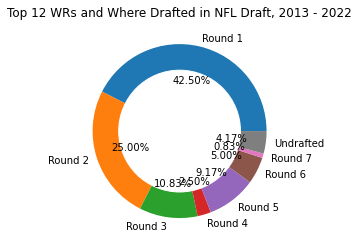

In [88]:
# create a donut chart and save the figure to share for the top 12 WRs and where they were originally drafted

round_drafted = ['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 6', 'Round 7', 'Undrafted']
plt.pie(top_12_by_round, labels = round_drafted, autopct='%.2f%%')
plt.title('Top 12 WRs and Where Drafted in NFL Draft, 2013 - 2022')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('top12_WRs_RoundDrafted.png', dpi=300, bbox_inches='tight', facecolor='#f2f2f2')
plt.show()


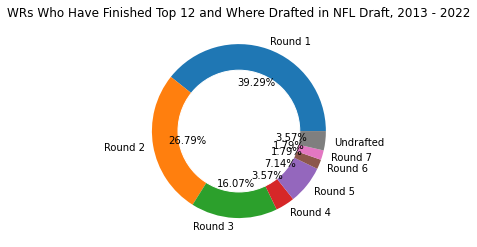

In [89]:
# create a donut chart and save the figure to share for the top unique WRs and where they were originally drafted

plt.pie(top_12_unique_by_round, normalize=True, labels=round_drafted, autopct='%.2f%%')
plt.title('WRs Who Have Finished Top 12 and Where Drafted in NFL Draft, 2013 - 2022')
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('WRs_WithTop12Finish_RoundDrafted.png', dpi=300, bbox_inches='tight', facecolor='#f2f2f2')
plt.show()

In [76]:
# save the top 12 player dataframe to a CSV file for future use
top_12.to_csv('top_12_wide_receivers_2013_2022.csv', index=False)

In [77]:
# save the globbed top 24 players dataframe to a CSV file for future use
nfl_wr_2013_2022.to_csv('top_24_wide_receivers_2013_2022.csv', index=False)